<a href="https://colab.research.google.com/github/sartaj-sb/TensorFlow-Advanced-Techniques-Specialization/blob/main/Custom_and_Distributed_Training_with_TensorFlow/Custom_training_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [11]:
class Model(object):
  def __init__(self):
    #initialize the weights
    self.w = tf.Variable(2.0)
    self.b = tf.Variable(1.0)
  # whenever we call this model it will return
  # w times x plus b if we pass x as a parameter
  def __call__(self,x):
      return self.w * x + self.b

#model = Model()


In [12]:
#defining the loss funtion
def loss(predicted_y,actual_y):
  return tf.reduce_mean(tf._square(predicted_y-actual_y))

In [19]:
# Synthesing training data
true_w = 5
true_b = 8
num_examples = 1000

xs = tf.random.normal(shape=[num_examples])
ys = true_w * xs + true_b

In [ ]:
print(xs)
print(ys)

In [21]:
# visualizing the loss by plotting the model's prediction in red and the training data in blue:
def plot_data(inputs,outputs, predicted_outputs):
  real = plt.scatter(inputs,outputs,c='b')
  predicted =plt.scatter(inputs, predicted_outputs,c='r')
  plt.legend((real,predicted),('Real Data','Predicted Data'))
  plt.show

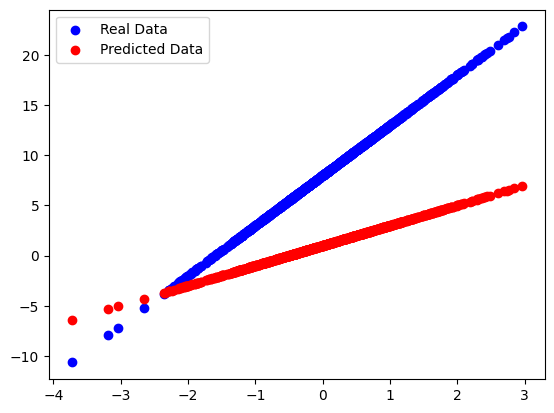

In [23]:
model = Model()
plot_data(xs,ys,model(xs))

In [26]:
# defining the loss function
def loss(predicted_y,target_y):
  return tf.reduce_mean(tf.square(predicted_y-target_y))

In [36]:
#defining the training loop
def train(model,inputs,outputs,learning_rate):
  with tf.GradientTape() as tape:
    current_loss = loss(model(inputs),outputs)
  dw,db = tape.gradient(current_loss,[model.w,model.b])
  model.w.assign_sub(learning_rate * dw)
  model.b.assign_sub(learning_rate * db)

  return current_loss


In [37]:
# collect the history of  W-values and b-values  to plot later
list_w,list_b = [],[]
epochs = range(15)
losses = []
for epoch in epochs:
  list_w.append(model.w.numpy())
  list_b.append(model.b.numpy())
  current_loss = train(model,xs,ys,learning_rate=0.1)
  losses.append(current_loss)
  print('Epoch %2d: w=%1.2f b=%1.2f, loss=%2.5f' %
        (epoch,list_w[-1],list_b[-1],current_loss))

Epoch  0: w=2.00 b=1.00, loss=59.32138
Epoch  1: w=2.64 b=2.42, loss=37.52956
Epoch  2: w=3.14 b=3.55, loss=23.74472
Epoch  3: w=3.54 b=4.46, loss=15.02426
Epoch  4: w=3.85 b=5.18, loss=9.50720
Epoch  5: w=4.09 b=5.75, loss=6.01654
Epoch  6: w=4.29 b=6.21, loss=3.80783
Epoch  7: w=4.44 b=6.57, loss=2.41015
Epoch  8: w=4.56 b=6.86, loss=1.52563
Epoch  9: w=4.65 b=7.09, loss=0.96582
Epoch 10: w=4.73 b=7.28, loss=0.61148
Epoch 11: w=4.79 b=7.42, loss=0.38717
Epoch 12: w=4.83 b=7.54, loss=0.24518
Epoch 13: w=4.87 b=7.63, loss=0.15527
Epoch 14: w=4.90 b=7.71, loss=0.09835


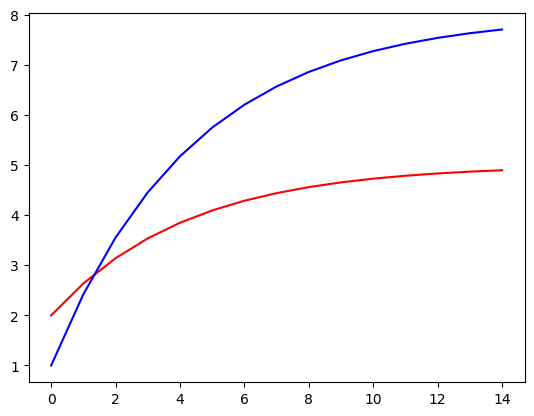

In [38]:
plt.plot(epochs,list_w,'r',epochs,list_b,'b')

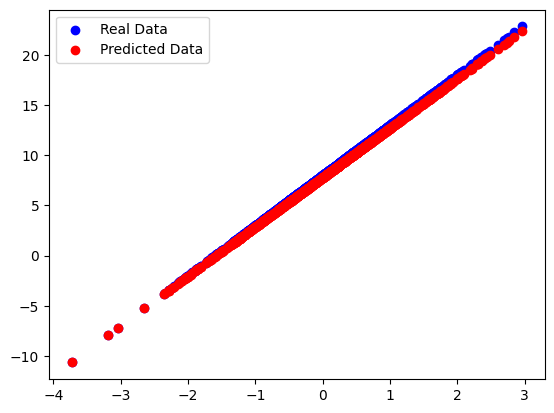

In [39]:
plot_data(xs,ys,model(xs))